In [5]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
import math
import seaborn as sns

CLEAN AND LOAD DATA


In [ ]:
import os
def load_datasets():
    start_path = "C:/Users/talno/microbiom_project/all_datasets/"
    datasets = [x for x in os.listdir("C:/Users/talno/microbiom_project/all_datasets")]
    all_ibds, all_metas = [], []
    
    for name in datasets:
        subname = name[:-8]
        ibd = pd.read_csv(f'{start_path}{name}/RDP/{subname}.otu_table.100.denovo.rdp_assigned',sep='\t')
        try:
            meta = pd.read_csv(f'{start_path}{name}/{subname}.metadata.txt',sep='\t')
        except:
            meta = pd.read_csv(f'{start_path}{name}/{subname}.metadata.txt',sep='\t', encoding= 'unicode_escape')
        meta.rename(columns={meta.columns[0]: "#SampleID"}, inplace=True)
        all_ibds.append(ibd)
        all_metas.append(meta)
    return all_ibds, all_metas

all_names = [x[:-8] for x in os.listdir("C:/Users/talno/microbiom_project/all_datasets/")]
all_ibds, all_metas = load_datasets()

def clean(meta,ibd,name):
    
    otu = ibd.copy()
    otu["Unnamed: 0"] = otu["Unnamed: 0"].str.split(';', expand=True)[4] + '_' + otu["Unnamed: 0"].str.split(';', expand=True)[5]
    otu = otu.groupby(["Unnamed: 0"]).sum()
    try:
        otu.drop('f___g__', inplace=True)
    except Exception:
        print("no g__, f__")
    otu = otu /otu.sum(axis = 0)
    otu.fillna(0,inplace=True)
    otu = otu.T
    meta.set_index("#SampleID", inplace=True)
    keepsmpls = [i for i in otu.index if i in meta.index]
    otu = otu.loc[keepsmpls]
    meta = meta.loc[keepsmpls]
    otu = otu.join(meta.DiseaseState)
    otu.loc[:, "State"] = otu.loc[:, "DiseaseState"].map(
        {"ASD": "D", "nonCDI": "H", "nonIBD": "H", "CD": "D", "UC": "D", "CDI": "D", "H": "H", "postFMT_CDI": "H",
         "ASD": "D", 'HIV': "D", 'EDD': "D", "CRC": 'D', 'OB': "D", 'PAR': "D", "OW": "D", "CIRR": "D", "MHE": "D",
         "nonCRC": "H", "RA": "D", "T1D": "D", "PSA": "H", "nonCDI": "H", "nonCRC": "H", "NASH": "D", "CIRR": "D", "nonNASH-OB": "H"})
    otu["From"] = name
    return otu

fixed = []
for ibd, meta, name in zip(all_ibds, all_metas, all_names):
       fixed.append(clean(meta,ibd,name))
finish_data = pd.concat(fixed)
finish_data.fillna(0,inplace=True)
finish_data.reset_index(drop=True, inplace=True)    
finish_data.to_csv("cleaned_microbiomeHD_29_g")

In [27]:
disease = ["CD","CDI","autism", "RA", "T1D", "CRC", "EDD","HIV", "PAR", "OB", "NASH", "MHE", "ASD"]
disease_map = {"OB": ['ob_goodrich', 'ob_gordon_2008_v2', 'ob_ross', 'ob_zupancic'], "NASH": ['nash_chan', 'nash_ob_baker'], "MHE":['mhe_zhang'], "CD":['ibd_alm','ibd_engstrand_maxee','ibd_gevers_2014','ibd_huttenhower']
               ,"CDI":['cdi_schubert', 'cdi_vincent_v3v5', 'cdi_youngster'],"autism":['autism_kb'], "RA":['ra_littman'],"T1D":['t1d_alkanani','t1d_mejialeon'],"CRC":['crc_baxter', 'crc_xiang', 'crc_zackular', 'crc_zeller', 'crc_zhao'],
               "EDD":['edd_singh'],"HIV":['hiv_dinh', 'hiv_lozupone', 'hiv_noguerajulian'], "PAR": ['par_scheperjans'], "ASD": ['asd_son']}

READ THE CLEANED DATA

-relative abundance 

-microbiome HD is concatenated

-merged with meta data - healthy vs disease


In [137]:
# dataHD = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_microbiomeHD_versionA")
dataHD = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/american_gut/cleaned_microbiomeHD_29_g")
dataAmericans = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_Americans_versionA", low_memory=False)

In [44]:
dataHD

,Unnamed: 0,f__Acidaminococcaceae_g__,f__Acidaminococcaceae_g__Acidaminococcus,f__Acidaminococcaceae_g__Phascolarctobacterium,f__Acidaminococcaceae_g__Succinispira,f__Actinomycetaceae_g__Actinomyces,f__Anaeroplasmataceae_g__Anaeroplasma,f__Bacillales_Incertae_Sedis_XI_g__Gemella,f__Bacteroidaceae_g__Bacteroides,f__Bifidobacteriaceae_g__Bifidobacterium,...,f__Bradyrhizobiaceae_g__,f__Clostridiaceae_1_g__Fervidicella,f__Enterobacteriaceae_g__Mangrovibacter,f__Enterobacteriaceae_g__Yokenella,f__Phyllobacteriaceae_g__Mesorhizobium,f__Rhodocyclaceae_g__Azonexus,f__Rhodocyclaceae_g__Sulfuritalea,f__Succinivibrionaceae_g__Succinimonas,f__Rhodocyclaceae_g__Denitratisoma,f__Flammeovirgaceae_g__Limibacter
0,0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000144,0.597264,0.000144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000127,0.555175,0.001776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.010579,0.000000,0.0,0.000000,0.000000,0.000000,0.269446,0.001556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.015077,0.0,0.000000,0.000000,0.000000,0.423267,0.001575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.000000,0.007179,0.0,0.000000,0.000000,0.000000,0.665121,0.000150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,4612,0.0,0.040010,0.000000,0.0,0.000000,0.000000,0.000000,0.089634,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4613,4613,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.155215,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4614,4614,0.0,0.000589,0.000000,0.0,0.000000,0.000000,0.000000,0.164263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4615,4615,0.0,0.000000,0.000000,0.0,0.000224,0.000000,0.000000,0.754359,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
dataHD.drop(columns='Unnamed: 0', inplace=True)
dataAmericans.drop(columns='Unnamed: 0', inplace=True)

In [8]:
keep_features = [i for i in dataHD.columns if i in dataAmericans.columns]
n = len(keep_features)
print("features left: ", n)

features left:  145


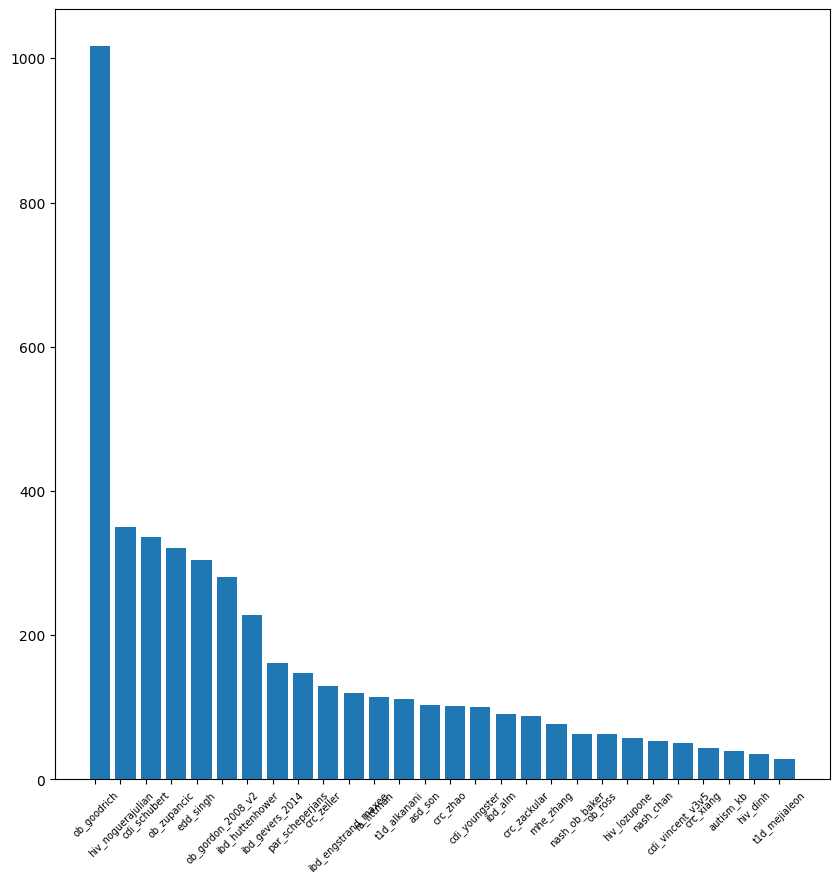

In [47]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(np.arange(0, len(dataHD.From.value_counts())), dataHD.From.value_counts())
plt.xticks(np.arange(0-0.2, len(dataHD.From.value_counts())-0.2), list(dataHD.From.value_counts().keys()), rotation=45, size=7)
plt.show()
# plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/samples_number.png')


In [9]:
dataHD_filtered = dataHD.loc[:,keep_features]
dataAmericans_filtered = dataAmericans.loc[:,keep_features]
print(dataAmericans_filtered.shape, dataHD_filtered.shape)


(9509, 145) (4617, 145)


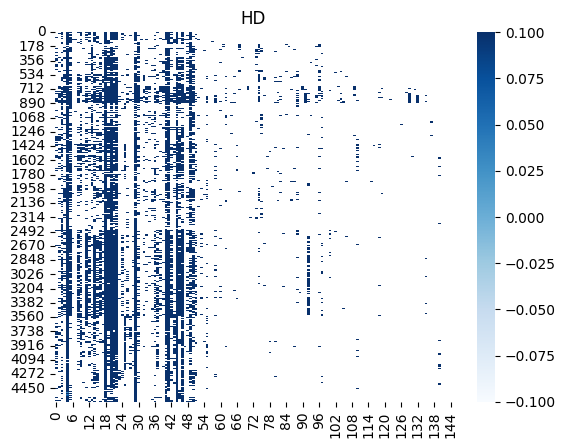

In [49]:
%matplotlib inline
np.seterr(divide = 'ignore')
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
plt.figure()
plt.xticks(range(n), keep_features)
plt.yticks(range(len(dataHD_filtered)))
plt.title('HD')
plot = seaborn.heatmap(-np.log(dataHD_filtered.values), cmap="Blues")
# plt.show()
# plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/HD_headtmap.png')


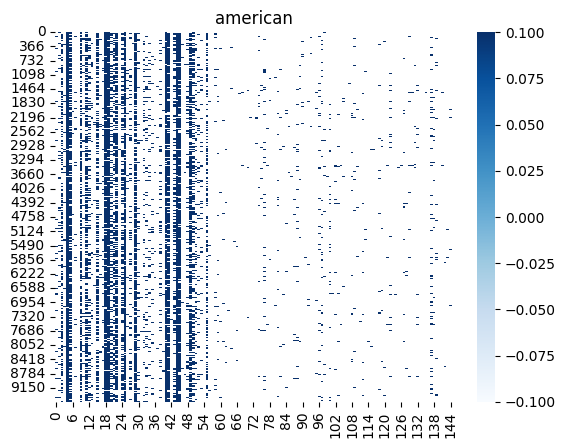

In [35]:
plt.figure()
plt.xticks(range(n), keep_features, rotation=90)
plt.yticks(range(len(dataAmericans_filtered)))
plt.title('american')
plot = seaborn.heatmap(-np.log(dataAmericans_filtered.values), cmap="Blues")
# plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Americans_headtmap.png')

C:\Users\talno\AppData\Local\Temp\ipykernel_12216\4037173796.py:4: RuntimeWarning: divide by zero encountered in log
  p1 = seaborn.heatmap(-np.log(Healthy.values), cmap="Blues", ax=axes[0])
C:\Users\talno\AppData\Local\Temp\ipykernel_12216\4037173796.py:5: RuntimeWarning: divide by zero encountered in log
  p2 = seaborn.heatmap(-np.log(Disease.values), cmap="Blues", ax=axes[1])


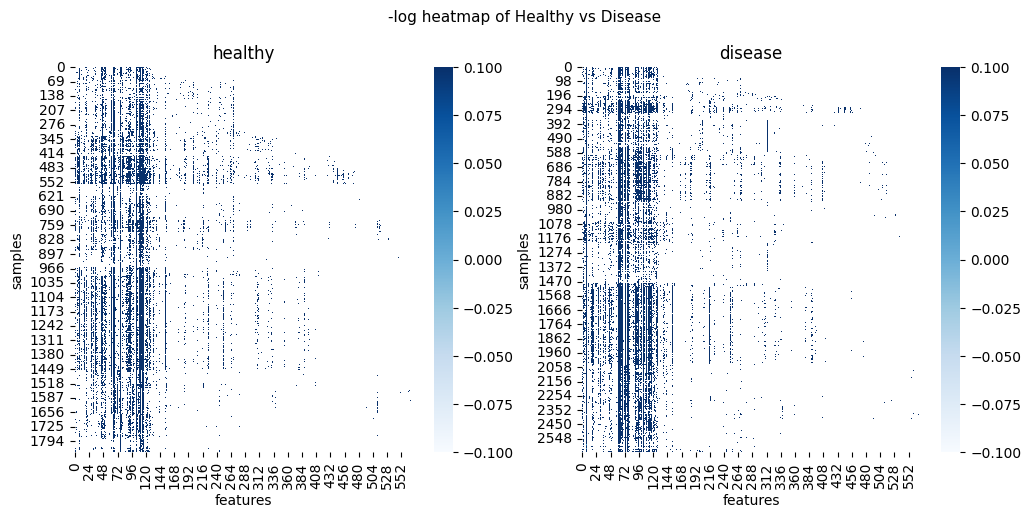

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
Healthy = dataHD.query("State == 'H'").drop(columns=["DiseaseState","State", "From"])
Disease = dataHD.query("State == 'D'").drop(columns=["DiseaseState","State", "From"])
p1 = seaborn.heatmap(-np.log(Healthy.values), cmap="Blues", ax=axes[0])
p2 = seaborn.heatmap(-np.log(Disease.values), cmap="Blues", ax=axes[1])

p1.set_xlabel('features')
p1.set_ylabel('samples')
p2.set_xlabel('features')
p2.set_ylabel('samples')

axes[0].set_title("healthy")
axes[1].set_title("disease")

np.seterr(divide = 'warn')

fig.suptitle(f"-log heatmap of Healthy vs Disease", x=0.5, y=0.995, fontsize=11)
plt.show()



After dropping features- whats left...

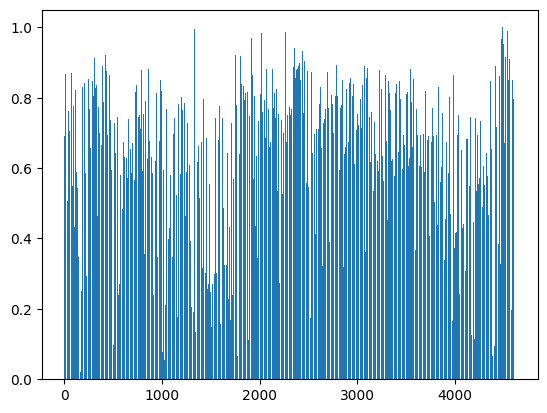

In [53]:

plt.bar(np.arange(0, len(dataHD_filtered)), list(dataHD_filtered.sum(axis=1)))
plt.show()
# plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Remaining_percentage_after_filter.png')

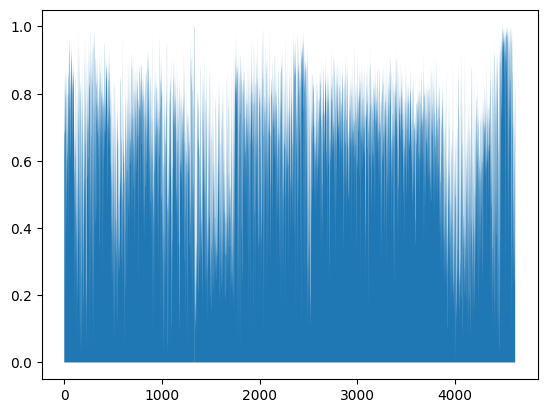

In [54]:
from scipy.interpolate import make_interp_spline, BSpline

#create data
x = np.arange(0, len(dataHD_filtered))
y = np.array(list(dataHD_filtered.sum(axis=1)))

plt.fill_between(x, y,0, alpha=1)
# plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Remaining_percentage_after_filter2.png')


In [18]:
dataAmericans_filtered.shape, dataHD_filtered.shape

((9509, 145), (4617, 145))

In [141]:
all_data = pd.concat([dataHD_filtered, dataAmericans_filtered]).reset_index()

In [110]:
all_data

,index,f__Acidaminococcaceae_g__,f__Acidaminococcaceae_g__Acidaminococcus,f__Acidaminococcaceae_g__Phascolarctobacterium,f__Actinomycetaceae_g__Actinomyces,f__Bacteroidaceae_g__Bacteroides,f__Bifidobacteriaceae_g__Bifidobacterium,f__Burkholderiaceae_g__Ralstonia,f__Caulobacteraceae_g__Brevundimonas,f__Coriobacteriaceae_g__,...,f__Sphingobacteriaceae_g__,f__Succinivibrionaceae_g__Succinatimonas,f__Burkholderiaceae_g__,f__Sphingomonadaceae_g__Blastomonas,f__Enterobacteriaceae_g__Hafnia,f__Lachnospiraceae_g__Butyrivibrio,f__Rhizobiaceae_g__Ensifer,f__Leptotrichiaceae_g__,f__Xanthomonadaceae_g__Luteimonas,f__Rhodocyclaceae_g__Azonexus
0,0,0.0,0.000000,0.000000,0.000000,0.597264,0.000144,0.000144,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.000000,0.000000,0.000000,0.555175,0.001776,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.010579,0.000000,0.000000,0.269446,0.001556,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.015077,0.000000,0.423267,0.001575,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.000000,0.007179,0.000000,0.665121,0.000150,0.000000,0.0,0.002094,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,9504,0.0,0.000000,0.000000,0.000000,0.070272,0.001062,0.000000,0.0,0.000000,...,0.0,0.0,0.226923,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14122,9505,0.0,0.000000,0.000000,0.000000,0.037244,0.006983,0.000000,0.0,0.000000,...,0.0,0.0,0.000931,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14123,9506,0.0,0.000000,0.000000,0.000000,0.053401,0.007534,0.000000,0.0,0.000000,...,0.0,0.0,0.000443,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14124,9507,0.0,0.000000,0.000437,0.000125,0.075019,0.051447,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
all_data.drop('index',axis=1, inplace=True)
# all_data.drop([1330, 1331, 4006], inplace=True)

In [11]:
all_data.values.shape, len(all_data.index)

((14126, 146), 14126)

In [126]:
all_data[all_data.sum(axis=1) == 0]

,f__Acidaminococcaceae_g__,f__Acidaminococcaceae_g__Acidaminococcus,f__Acidaminococcaceae_g__Phascolarctobacterium,f__Actinomycetaceae_g__Actinomyces,f__Bacteroidaceae_g__Bacteroides,f__Bifidobacteriaceae_g__Bifidobacterium,f__Burkholderiaceae_g__Ralstonia,f__Caulobacteraceae_g__Brevundimonas,f__Coriobacteriaceae_g__,f__Coriobacteriaceae_g__Collinsella,...,f__Sphingobacteriaceae_g__,f__Succinivibrionaceae_g__Succinatimonas,f__Burkholderiaceae_g__,f__Sphingomonadaceae_g__Blastomonas,f__Enterobacteriaceae_g__Hafnia,f__Lachnospiraceae_g__Butyrivibrio,f__Rhizobiaceae_g__Ensifer,f__Leptotrichiaceae_g__,f__Xanthomonadaceae_g__Luteimonas,f__Rhodocyclaceae_g__Azonexus
1330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
from skbio.diversity import beta_diversity
bc_dm = beta_diversity("braycurtis", all_data, list(all_data.index))
# bc_dm = beta_diversity(counts= all_data.values,ids= all_data.index, metric="braycurtis")

In [132]:
from skbio.stats.ordination import pcoa
bc_pc = pcoa(bc_dm)


c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -38.82456232723804 and the largest is 731.3111358040362.
  warn(


In [155]:
pcoa_comp = bc_pc.samples.loc[9509:, ['PC1'	,'PC2']].reset_index().drop('index', axis=1)

In [139]:
dataHD

,f__Acidaminococcaceae_g__,f__Acidaminococcaceae_g__Acidaminococcus,f__Acidaminococcaceae_g__Phascolarctobacterium,f__Acidaminococcaceae_g__Succinispira,f__Actinomycetaceae_g__Actinomyces,f__Anaeroplasmataceae_g__Anaeroplasma,f__Bacillales_Incertae_Sedis_XI_g__Gemella,f__Bacteroidaceae_g__Bacteroides,f__Bifidobacteriaceae_g__Bifidobacterium,f__Burkholderiaceae_g__Ralstonia,...,f__Bradyrhizobiaceae_g__,f__Clostridiaceae_1_g__Fervidicella,f__Enterobacteriaceae_g__Mangrovibacter,f__Enterobacteriaceae_g__Yokenella,f__Phyllobacteriaceae_g__Mesorhizobium,f__Rhodocyclaceae_g__Azonexus,f__Rhodocyclaceae_g__Sulfuritalea,f__Succinivibrionaceae_g__Succinimonas,f__Rhodocyclaceae_g__Denitratisoma,f__Flammeovirgaceae_g__Limibacter
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000144,0.597264,0.000144,0.000144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000127,0.555175,0.001776,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.010579,0.000000,0.0,0.000000,0.000000,0.000000,0.269446,0.001556,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.015077,0.0,0.000000,0.000000,0.000000,0.423267,0.001575,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.007179,0.0,0.000000,0.000000,0.000000,0.665121,0.000150,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.0,0.040010,0.000000,0.0,0.000000,0.000000,0.000000,0.089634,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4613,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.155215,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4614,0.0,0.000589,0.000000,0.0,0.000000,0.000000,0.000000,0.164263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4615,0.0,0.000000,0.000000,0.0,0.000224,0.000000,0.000000,0.754359,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
dataHD.drop([1330, 1331, 4006], inplace=True)

In [150]:
all_data['From'] = 'american'
all_data.loc[:,['From']]= dataHD['From']

In [151]:
all_data

,f__Acidaminococcaceae_g__,f__Acidaminococcaceae_g__Acidaminococcus,f__Acidaminococcaceae_g__Phascolarctobacterium,f__Actinomycetaceae_g__Actinomyces,f__Bacteroidaceae_g__Bacteroides,f__Bifidobacteriaceae_g__Bifidobacterium,f__Burkholderiaceae_g__Ralstonia,f__Caulobacteraceae_g__Brevundimonas,f__Coriobacteriaceae_g__,f__Coriobacteriaceae_g__Collinsella,...,f__Succinivibrionaceae_g__Succinatimonas,f__Burkholderiaceae_g__,f__Sphingomonadaceae_g__Blastomonas,f__Enterobacteriaceae_g__Hafnia,f__Lachnospiraceae_g__Butyrivibrio,f__Rhizobiaceae_g__Ensifer,f__Leptotrichiaceae_g__,f__Xanthomonadaceae_g__Luteimonas,f__Rhodocyclaceae_g__Azonexus,From
0,0.0,0.000000,0.000000,0.000000,0.597264,0.000144,0.000144,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,asd_son
1,0.0,0.000000,0.000000,0.000000,0.555175,0.001776,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,asd_son
2,0.0,0.010579,0.000000,0.000000,0.269446,0.001556,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,asd_son
3,0.0,0.000000,0.015077,0.000000,0.423267,0.001575,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,asd_son
4,0.0,0.000000,0.007179,0.000000,0.665121,0.000150,0.000000,0.0,0.002094,0.000150,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,asd_son
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,0.0,0.000000,0.000000,0.000000,0.070272,0.001062,0.000000,0.0,0.000000,0.000000,...,0.0,0.226923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14122,0.0,0.000000,0.000000,0.000000,0.037244,0.006983,0.000000,0.0,0.000000,0.003259,...,0.0,0.000931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14123,0.0,0.000000,0.000000,0.000000,0.053401,0.007534,0.000000,0.0,0.000000,0.000000,...,0.0,0.000443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14124,0.0,0.000000,0.000437,0.000125,0.075019,0.051447,0.000000,0.0,0.000000,0.004240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [147]:
bc_pc.samples

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14114,PC14115,PC14116,PC14117,PC14118,PC14119,PC14120,PC14121,PC14122,PC14123
0,-0.303833,-0.128881,0.229254,0.107629,0.166060,-0.028035,-0.027954,0.026190,0.057548,0.002675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.431740,-0.128321,0.056419,0.097724,0.149619,-0.002998,-0.025009,0.037525,0.089244,0.072689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.293866,-0.139321,0.005928,-0.136473,0.033111,0.008015,0.009956,-0.122355,-0.006559,0.267058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.396504,-0.167116,0.041927,-0.047775,0.099627,-0.021108,-0.007865,-0.010601,0.072380,0.161680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.440650,-0.106902,-0.005486,0.067410,0.105239,-0.215484,0.095163,0.030902,0.090413,-0.012810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,0.078175,0.061637,-0.203556,-0.074403,0.014652,-0.112110,0.150133,0.032628,0.023931,-0.020894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14122,0.285471,0.091030,-0.190496,0.144566,0.050024,-0.024646,-0.201311,0.066670,-0.058598,0.054875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14123,0.306698,0.103892,0.170094,0.045613,-0.013186,-0.033877,0.034703,0.086482,0.063527,0.013261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14124,0.260523,0.143109,0.098356,0.077162,-0.063626,-0.001878,-0.059073,-0.059174,0.112670,0.017474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ValueError: One or more IDs in the ordination results are not in the data frame, or there is missing data in the data frame's 'From' column.

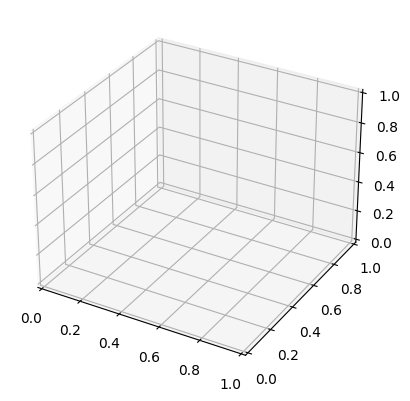

In [152]:

bc_pc.plot(df=all_data, column='From')


In [156]:
pcoa_comp

,PC1,PC2
0,0.067475,-0.246134
1,0.026463,0.210936
2,0.061561,0.172266
3,-0.177844,0.222361
4,0.268509,0.103543
...,...,...
4612,0.078175,0.061637
4613,0.285471,0.091030
4614,0.306698,0.103892
4615,0.260523,0.143109


In [157]:
pcoa_comp.index = dataHD_filtered.index

In [158]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
def PC(feature_table, method="pcoa", distance_metric="braycurtis"):
    if method == "pcoa":
        distance_table = pd.DataFrame(pairwise_distances(feature_table, metric=distance_metric), index=feature_table.index,
                                      columns=feature_table.index)
        mod = MDS(n_components=1, dissimilarity="precomputed")
        mod_first_comp = mod.fit_transform(distance_table)
    split_value = np.random.uniform(np.min(mod_first_comp), np.max(mod_first_comp))
    left_samples_list = list(feature_table[mod_first_comp >= split_value].index)
    right_samples_list = list(feature_table[mod_first_comp < split_value].index)
    return split_value, left_samples_list, right_samples_list

In [ ]:
all_data = pd.concat([dataAmericans_filtered, dataHD_filtered])

In [38]:
bc_pc.proportion_explained[:2]*100

PC1    64.568696
PC2    24.727044
dtype: float64

In [44]:
dataHD[dataHD['State'] == 'D'].index

Int64Index([   0,    2,    3,    4,    7,    8,   10,   12,   13,   14,
            ...
            4606, 4607, 4608, 4609, 4610, 4611, 4613, 4614, 4615, 4616],
           dtype='int64', length=2640)

In [53]:
dataHD['DiseaseState'].unique()

array(['ASD', 'H', 'CDI', 'nonCDI', 'postFMT_CDI', 'CRC', 'nonCRC', '0',
       'EDD', 'HIV', 'UC', 'nonIBD', 'CD', 'IBDundef', 'CIRR', 'MHE',
       'NASH', 'nonNASH-OB', 'OB', 'OW', 'PAR', 'PSA', 'RA', 'T1D'],
      dtype=object)

In [48]:
colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']

In [159]:
def plot_by(name):
    for disease, color in zip(dataHD[name].unique(), colors):
        plt.scatter(pcoa_comp.loc[dataHD[dataHD[name] == disease].index,'PC1'], pcoa_comp.loc[dataHD[dataHD[name] == disease].index,'PC2'],marker='o',s=10, color= color)
    plt.legend(dataHD[name].unique(), bbox_to_anchor=(1, 0., 0.5, 0.5))


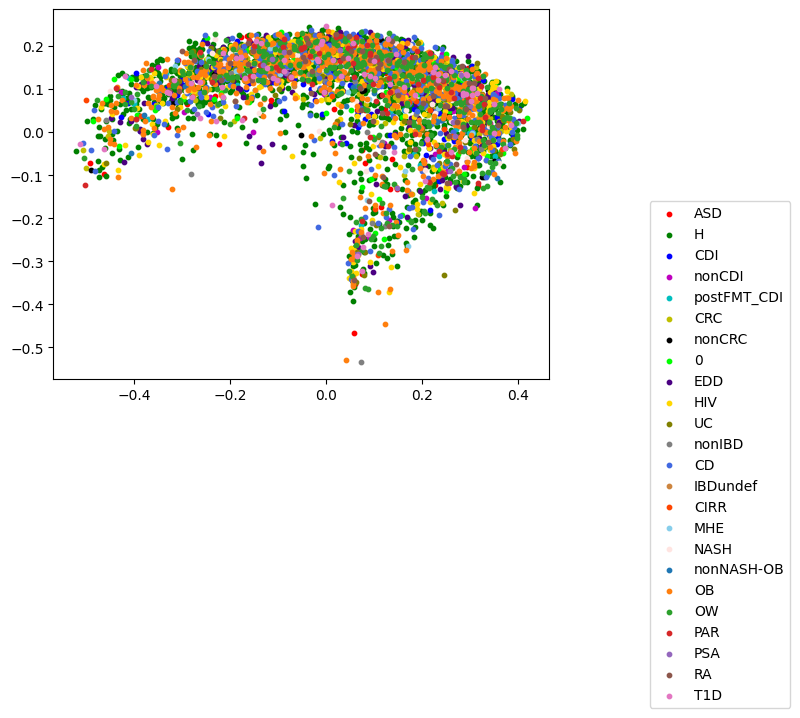

In [162]:
plot_by('DiseaseState')

PCA- fit both data

In [ ]:
pca = PCA(n_components=2)
pca.fit(dataAmericans_filtered)
components_americans1 = pca.transform(dataAmericans_filtered)
components_HD1 = pca.transform(dataHD_filtered)
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_americans1 = pd.DataFrame(data= components_americans1, columns= ['Pc1', 'Pc2'])
pca_HD1 = pd.DataFrame(data= components_HD1, columns= ['Pc1', 'Pc2'])


explained variance:  0.5197981346936755


PCA- fit only american

In [ ]:
pca = PCA(n_components=2)
pca.fit(all_data)
components_americans2 = pca.transform(dataAmericans_filtered)
components_HD2 = pca.transform(dataHD_filtered)
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_americans2 = pd.DataFrame(data= components_americans2, columns= ['Pc1', 'Pc2'])
pca_HD2 = pd.DataFrame(data= components_HD2, columns= ['Pc1', 'Pc2'])

explained variance:  0.5879351717965721


PCA- all data vs only american's

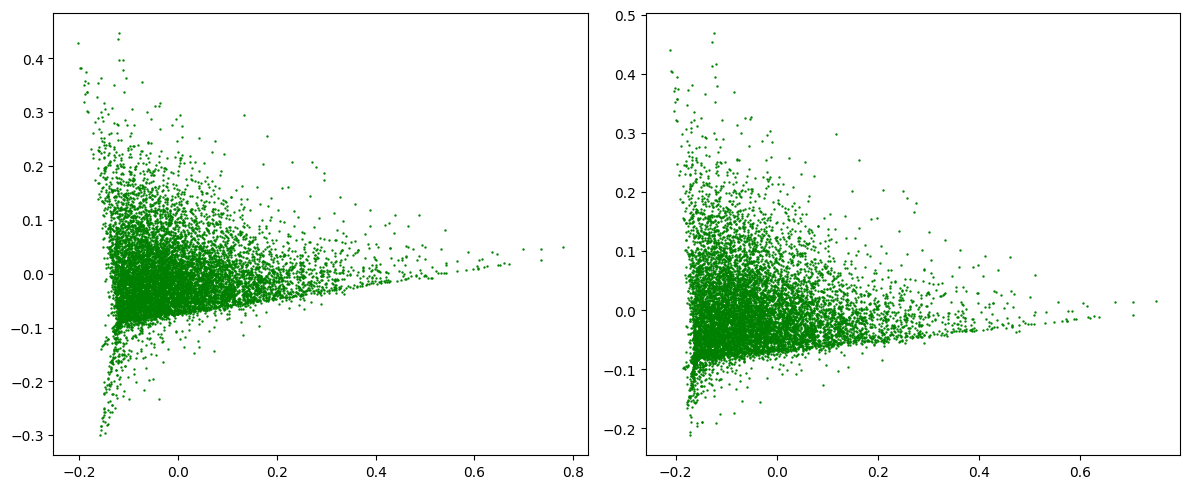

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
axes[1].scatter(pca_americans2.loc[:,'Pc1'], pca_americans2.loc[:,'Pc2'],marker='.',s=2, color= 'g')
fig.tight_layout()
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/americans_pca_vs_all_pca.png')
plt.show()

In [ ]:
disease_map

{'OB': ['ob_goodrich', 'ob_gordon_2008_v2', 'ob_ross', 'ob_zupancic'],
 'NASH': ['nash_chan', 'nash_ob_baker'],
 'MHE': ['mhe_zhang'],
 'CD': ['ibd_alm',
  'ibd_engstrand_maxee',
  'ibd_gevers_2014',
  'ibd_huttenhower'],
 'CDI': ['cdi_schubert', 'cdi_vincent_v3v5', 'cdi_youngster'],
 'autism': ['autism_kb'],
 'RA': ['ra_littman'],
 'T1D': ['t1d_alkanani', 't1d_mejialeon'],
 'CRC': ['crc_baxter', 'crc_xiang', 'crc_zackular', 'crc_zeller', 'crc_zhao'],
 'EDD': ['edd_singh'],
 'HIV': ['hiv_dinh', 'hiv_lozupone', 'hiv_noguerajulian'],
 'PAR': ['par_scheperjans'],
 'ASD': ['asd_son']}

C:\Users\talno\AppData\Local\Temp\ipykernel_6228\1286747752.py:21: RuntimeWarning: Mean of empty slice.
  x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
C:\Users\talno\AppData\Local\Temp\ipykernel_6228\1286747752.py:22: RuntimeWarning: Mean of empty slice.
  y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()


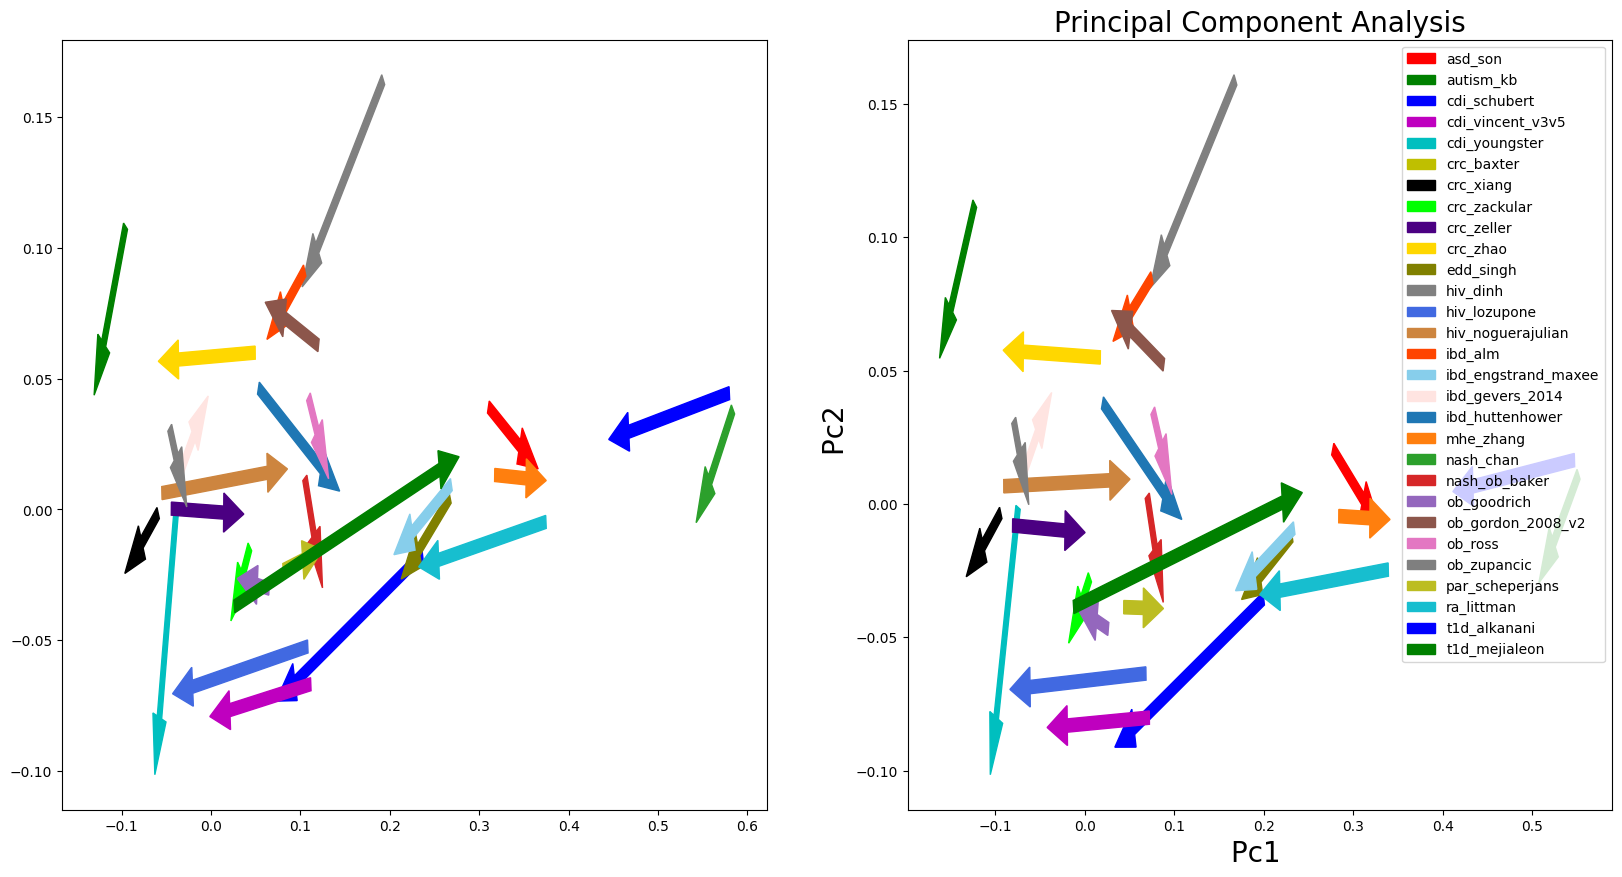

In [ ]:
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
itr = [pca_HD1, pca_HD2]
polar_data = dict()
for i, pca_HD in enumerate(itr):
    plt.xlabel('Pc1 ', fontsize=20)
    plt.ylabel('Pc2 ', fontsize=20)
    plt.title("Principal Component Analysis",fontsize=20)
    targets = np.array([[[name, 'H'], [name,'D']] for name in all_names])
    targets = targets.reshape((-1,2))
    # targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]
    colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose', '#1f77b4','#1f77b4','#ff7f0e', '#ff7f0e','#2ca02c', '#2ca02c','#d62728', '#d62728','#9467bd', '#9467bd', '#8c564b','#8c564b','#e377c2', '#e377c2', '#7f7f7f','#7f7f7f','#bcbd22', '#bcbd22', '#17becf','#17becf', 'b', 'b', 'g', 'g']
    arrows, var_x, var_y, angles, sizes = [], [], [], [], []
    # axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
    for target, color in zip(targets,colors):
        indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['State'] == target[1])
        fill = 'none'
        if target[1] == "D":
            fill = color
        x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()
        x_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc1'].values)
        y_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc2'].values)
        var_x.append(x_v)
        var_y.append(y_v)
        arrows.append(x)
        arrows.append(y)
        # axes[i].scatter(pca_HD.loc[indicesToKeep.values, 'Pc1'] , pca_HD.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)
    # find centroids and plotting an arrow
    col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']
    for j in range(0,len(arrows),4):
        axes[i].arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4], width = 0.005)
        angles.append(math.atan2(arrows[j+3]-arrows[j+1],arrows[j+2]-arrows[j]))
        sizes.append(math.sqrt((arrows[j+2]-arrows[j])**2+(arrows[j+3]-arrows[j+1])**2))
    plt.legend(all_names) 
    polar_data[i] = [var_x, var_y, angles, sizes]
# fig.show()

In [ ]:
def pca_disease(disease):
    arrows = []
    lst = disease_map[disease] + ['None']*(5-len(disease))
    data_partial = dataHD[(dataHD['From'] == lst[0]) | (dataHD['From'] == lst[1]) | (dataHD['From'] == lst[2]) | (dataHD['From'] == lst[3]) | (dataHD['From'] == lst[4])]
    keep_features = [i for i in data_partial.columns if i in dataAmericans.columns and data_partial[i].sum() > 0.1] 
    print(len(keep_features))  
    data_filtered = data_partial.loc[:,keep_features]
    dataAmericans_filtered = dataAmericans.loc[:,keep_features]     
    pca = PCA(n_components=2)
    pca.fit(pd.concat([dataAmericans_filtered, data_filtered]))
    components_americans = pca.transform(dataAmericans_filtered)
    components_disease = pca.transform(data_filtered)
    print("explained variance: ", sum(pca.explained_variance_ratio_))
    pca_americans = pd.DataFrame(data= components_americans, columns= ['Pc1', 'Pc2'])
    pca_disease = pd.DataFrame(data= components_disease, columns= ['Pc1', 'Pc2'])  
    
    plt.xlabel('Pc1 ', fontsize=10)
    plt.ylabel('Pc2 ', fontsize=10)
    plt.title("Principal Component Analysis",fontsize=20)
    targets = lst
    colors = ['r','c', 'b','lime']
    for target, color in zip(targets,colors):
        indicesToKeep = (data_partial['From'] == target) & (data_partial['State'] == 'H')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        # plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c=color, edgecolors=color, s=50)
        indicesToKeep = (data_partial['From'] == target) & (data_partial['State'] == 'D')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        # plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c='none', edgecolors=color, s=50)
    
    # find centroids and plotting an arrow
    col = ['r', 'c', 'b', 'lime']
    for j in range(0,len(arrows),4):
        plt.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4], width = 0.01)
    plt.legend(targets) 
    # fig.show() 

                              

49
explained variance:  0.6188737015541244


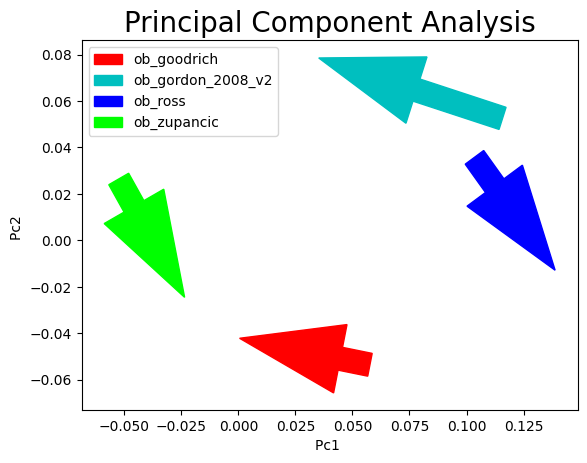

In [ ]:
pca_disease("OB")

In [ ]:
disease = ["CD","CDI","autism", "RA", "T1D", "CRC", "EDD","HIV", "PAR", "OB", "NASH", "MHE", "ASD"]
disease_map = {"OB": ['ob_goodrich', 'ob_gordon_2008_v2', 'ob_ross', 'ob_zupancic'], "NASH": ['nash_chan', 'nash_ob_baker'], "MHE":['mhe_zhang'], "CD":['ibd_alm','ibd_engstrand_maxee','ibd_gevers_2014','ibd_huttenhower']
               ,"CDI":['cdi_schubert', 'cdi_vincent_v3v5', 'cdi_youngster'],"autism":['autism_kb'], "RA":['ra_littman'],"T1D":['t1d_alkanani','t1d_mejialeon'],"CRC":['crc_baxter', 'crc_xiang', 'crc_zackular', 'crc_zeller', 'crc_zhao'],
               "EDD":['edd_singh'],"HIV":['hiv_dinh', 'hiv_lozupone', 'hiv_noguerajulian'], "PAR": ['par_scheperjans'], "ASD": ['asd_son']}
data_map = dict()
for key, vals in disease_map.items():
    for val in vals:
        data_map[val] = key

In [ ]:
data_map

{'ob_goodrich': 'OB',
 'ob_gordon_2008_v2': 'OB',
 'ob_ross': 'OB',
 'ob_zupancic': 'OB',
 'nash_chan': 'NASH',
 'nash_ob_baker': 'NASH',
 'mhe_zhang': 'MHE',
 'ibd_alm': 'CD',
 'ibd_engstrand_maxee': 'CD',
 'ibd_gevers_2014': 'CD',
 'ibd_huttenhower': 'CD',
 'cdi_schubert': 'CDI',
 'cdi_vincent_v3v5': 'CDI',
 'cdi_youngster': 'CDI',
 'autism_kb': 'autism',
 'ra_littman': 'RA',
 't1d_alkanani': 'T1D',
 't1d_mejialeon': 'T1D',
 'crc_baxter': 'CRC',
 'crc_xiang': 'CRC',
 'crc_zackular': 'CRC',
 'crc_zeller': 'CRC',
 'crc_zhao': 'CRC',
 'edd_singh': 'EDD',
 'hiv_dinh': 'HIV',
 'hiv_lozupone': 'HIV',
 'hiv_noguerajulian': 'HIV',
 'par_scheperjans': 'PAR',
 'asd_son': 'ASD'}

In [ ]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

POLAR PLOT

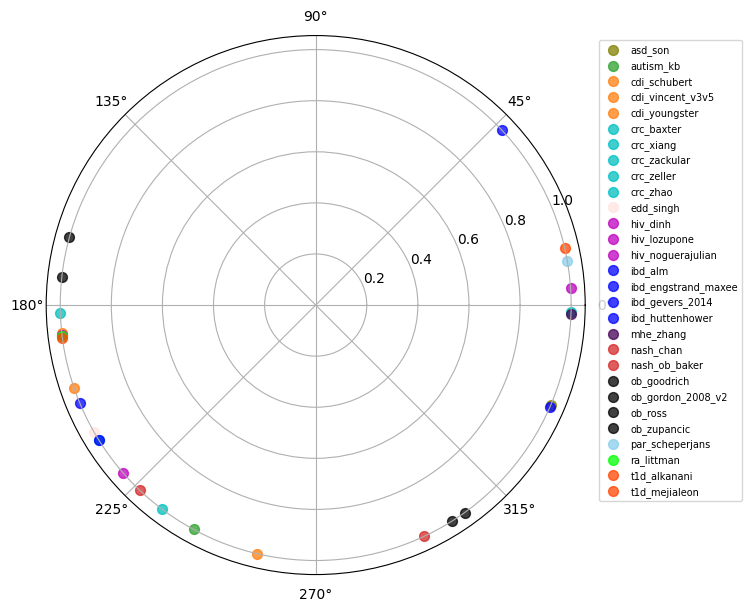

In [ ]:
from matplotlib.patches import Ellipse
# 'skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']
color_disease = {"CD": 'b', "CDI": '#ff7f0e', "autism": '#2ca02c', "OB": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime', "EDD": 'mistyrose', "PAR": 'skyblue', "NASH": '#d62728', "MHE": y, "ASD":'olive'}
var_x, var_y, angles, sizes = polar_data[0]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
for angle,name,size in zip(angles,all_names,sizes):
    # ax.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    size = 1
    c = ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
    # c = ax.scatter(angle, size, c=color, alpha=0.75, s=50)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

Now only for the microbiomeHD PCA.

explained variance:  0.5436284601116687


C:\Users\talno\AppData\Local\Temp\ipykernel_6228\2056966412.py:23: RuntimeWarning: Mean of empty slice.
  x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\talno\AppData\Local\Temp\ipykernel_6228\2056966412.py:24: RuntimeWarning: Mean of empty slice.
  y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\talno\AppData\Loca

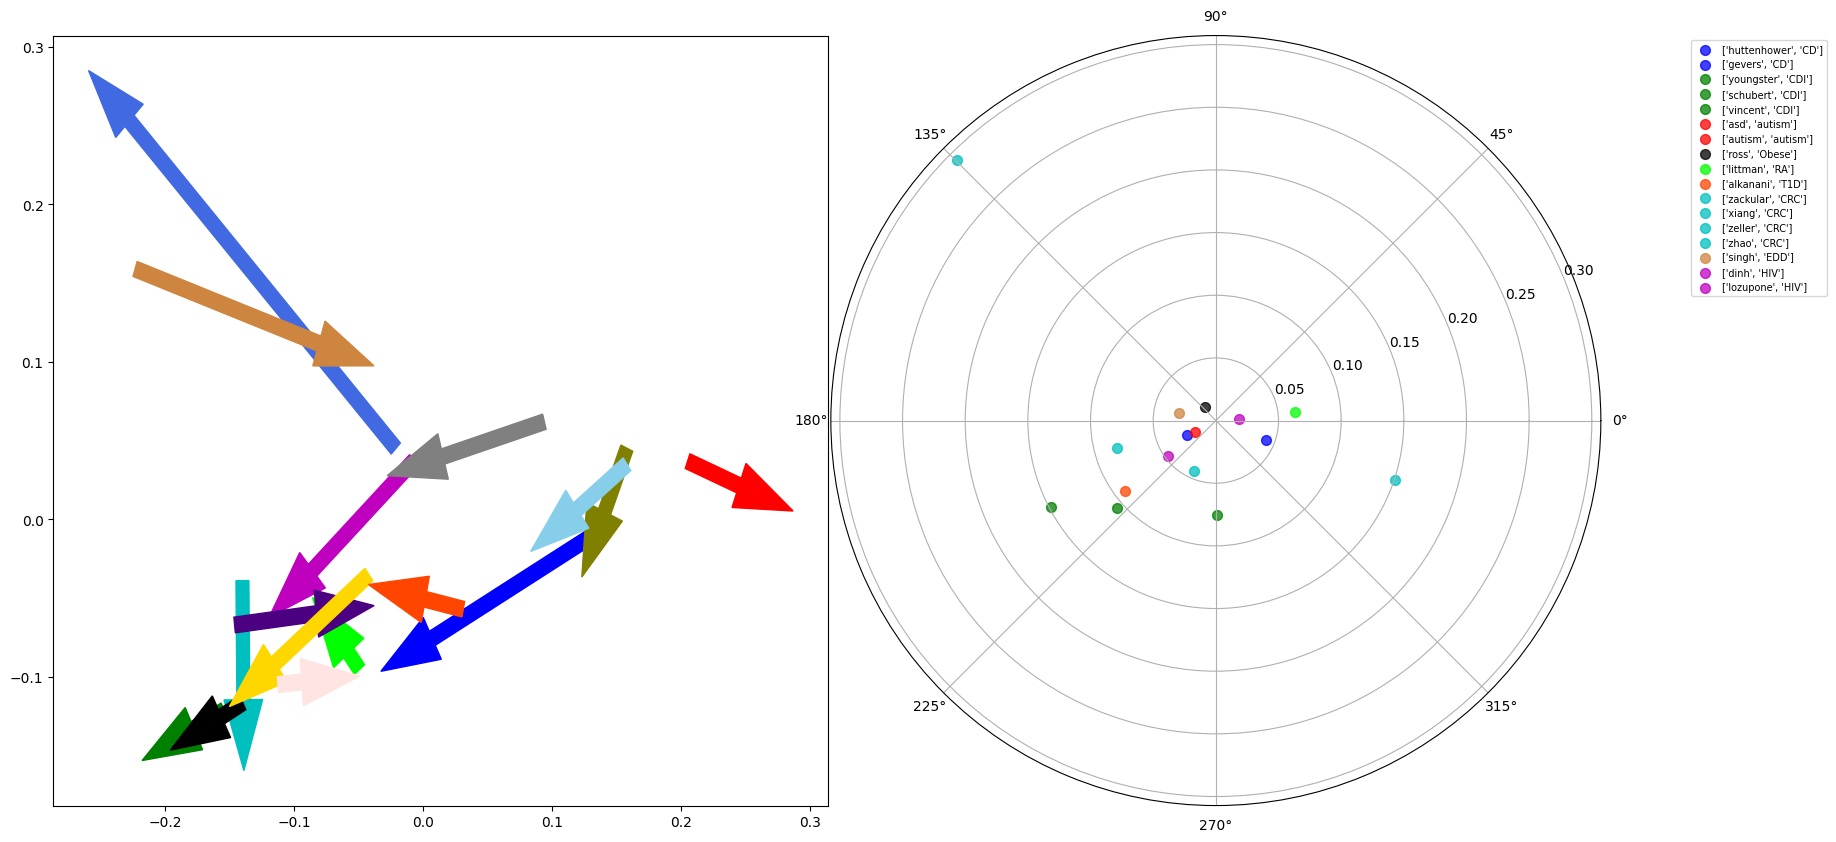

In [ ]:
pca = PCA(n_components=2)
components_HD = pca.fit_transform(dataHD.drop(columns=['DiseaseState', 'From', 'State']))
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_HD = pd.DataFrame(data= components_HD, columns= ['Pc1', 'Pc2'])

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, polar=True)
# plt.xlabel('Pc1 ', fontsize=20)
# plt.ylabel('Pc2 ', fontsize=20)
# plt.title("Principal Component Analysis",fontsize=20)
# targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]

colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose']
arrows, var_x, var_y, angles, sizes = [], [], [], [], []
# axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
for target, color in zip(targets,colors):
    indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['State'] == target[1])
    fill = 'none'
    if target[1] == "D":
        fill = color
    x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
    y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()
    x_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc1'].values)
    y_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc2'].values)
    var_x.append(x_v)
    var_y.append(y_v)
    arrows.append(x)
    arrows.append(y)
    # axes[0].scatter(pca_HD.loc[indicesToKeep.values, 'Pc1'] , pca_HD.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)
# find centroids and plotting an arrow
col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
for j in range(0,len(arrows),4):
    ax1.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4],width = 0.01)
    angles.append(math.atan2(arrows[j+3]-arrows[j+1],arrows[j+2]-arrows[j]))
    sizes.append(math.sqrt((arrows[j+2]-arrows[j])**2+(arrows[j+3]-arrows[j+1])**2))
L = ["huttenhower-CD", "gevers-CD", "youngster-CDI", "schubert-CDI","vincent-CDI","asd-ASD","autism","ross-OBESE","littman-RA","alkanani-T1D","xiang-CRC","zackular-CRC","zeller-CRC","zhao-CRC","singh-EDD","dinh-HIV","lozupone-HIV"]
plt.legend(L) 

colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
color_disease = {"CD": 'b', "CDI": 'g', "autism": 'r', "Obese": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime'}
L = [["huttenhower","CD"], ["gevers","CD"], ["youngster","CDI"], ["schubert","CDI"],["vincent","CDI"],["asd","autism"],["autism","autism"],["ross","Obese"],["littman","RA"],["alkanani","T1D"],["zackular","CRC"],["xiang","CRC"],["zeller","CRC"],["zhao","CRC"],["singh","EDD"],["dinh","HIV"],["lozupone","HIV"]]

for angle,name,size,x,y,color in zip(angles,L,sizes,var_x,var_y,colors):
    # ax2.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax2.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    c = ax2.scatter(angle, size, c=color_disease[name[1]], alpha=0.75, s=50)
    # c = ax2.scatter(angle, size, c=color, alpha=0.75, s=50)
ax2.legend(L,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

STATISTICS

In [ ]:
new_df = pd.DataFrame({'angles': np.rad2deg(angles), 'length': sizes, 'names': np.array(L)[:,0], 'disease': np.array(L)[:,1]})

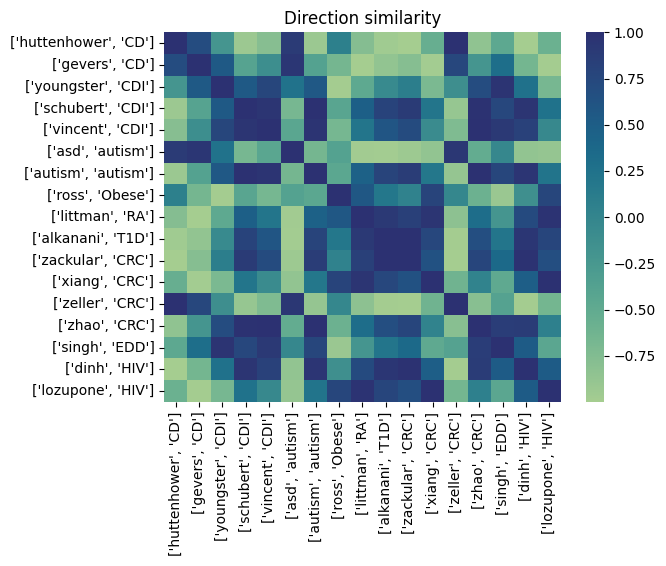

In [ ]:
mat = [[0 for i in range(len(angles))] for j in range(len(angles))]
disease = ["CD","CDI","autism", "Obese", "RA","T1D","CRC","EDD","HIV"]
L = [["huttenhower","CD"], ["gevers","CD"], ["youngster","CDI"], ["schubert","CDI"],["vincent","CDI"],["asd","autism"],["autism","autism"],["ross","Obese"],["littman","RA"],["alkanani","T1D"],["zackular","CRC"],["xiang","CRC"],["zeller","CRC"],["zhao","CRC"],["singh","EDD"],["dinh","HIV"],["lozupone","HIV"]]
helper = {"CD":[0,1],"CDI":[2,3,4],"autism":[5,6], "Obese":[7], "RA":[8],"T1D":[9],"CRC":[10,11,12,13],"EDD":[14],"HIV":[15,16]}
angles1 = np.rad2deg(angles)
n = len(disease)
for i in range(len(angles1)):
    for j in range(i,len(angles1)):
        diff = min(abs(angles1[i]-angles1[j]),360-abs(angles1[i]-angles1[j]))
        mat[i][j] = math.cos(math.radians(diff))
        mat[j][i] = mat[i][j]

mat_disease = [[0]*n for i in range(n)]
for i in range(n):
    for key,vals in helper.items():
        idx = disease.index(key)
        for val in vals:
            for x in helper[disease[i]]:
                mat_disease[i][idx] += mat[x][val]
        mat_disease[i][idx] /= len(vals)*len(helper[disease[i]])

plt.figure()
plt.title('Disease Similarity matrix',fontsize=20)
plt.title('Direction similarity')
plt.xticks(range(n), disease, rotation=90)
plt.yticks(range(n), disease)
plot = seaborn.heatmap(mat,xticklabels=L, yticklabels=L,cmap="crest")
plt.show()

In [ ]:

new_df['similarity'] = mat
new_df['similarity'] = [np.delete(new_df['similarity'][i], i) for i in range(17)]
new_df['pred'] = [np.delete(np.array((new_df['disease'] == new_df['disease'][i]).values*1),i) for i in range(17)]
indexes = [i for i in range(17) if i not in [7,8,9,14]]
new_df.loc[indexes,'different_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 0]))/len(new_df['similarity'][i][new_df['pred'][i] == 0]) for i in indexes]
new_df.loc[indexes,'same_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 1]))/len(new_df['similarity'][i][new_df['pred'][i] == 1]) for i in indexes]

In [ ]:
new_df.head(3)

,angles,length,names,disease,similarity,pred,different_disease,same_disease
0,-1.067088,0.066789,huttenhower,CD,"[0.7008012519641469, -0.20889985236939537, -0....","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.470753,0.700801
1,-46.575764,0.020414,gevers,CD,"[0.7008012519641469, 0.5512205398974475, -0.39...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.297481,0.700801
2,-103.124976,0.099082,youngster,CDI,"[-0.20889985236939537, 0.5512205398974475, 0.5...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.012222,0.656525


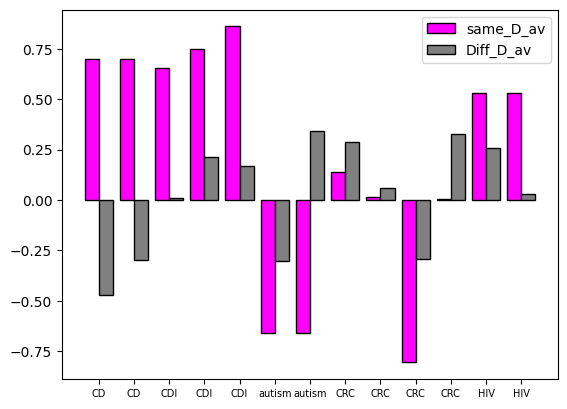

In [ ]:
n= len(indexes)
r = np.arange(n)
width = 0.4
  
  
plt.bar(r, new_df.loc[indexes,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_D_av')
plt.bar(r + width, new_df.loc[indexes, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='Diff_D_av')
  
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,new_df.loc[indexes,'disease'], size=7)
plt.legend()

auc:  0.5235215053763441


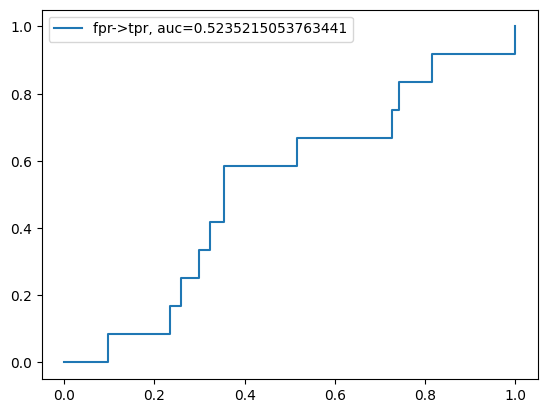

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred = np.asarray(list(np.stack(new_df['similarity'].values).reshape(-1)))
y_true = np.asarray(list(np.stack(new_df['pred'].values).reshape(-1)))
fpr, tpr, thresholds = roc_curve(y_true,y_pred)
plt.plot(fpr,tpr,label="fpr->tpr, auc="+str(metrics.auc(fpr, tpr)))
print("auc: ", metrics.auc(fpr, tpr))
plt.legend(fontsize=10)

In [40]:
dataHD = dataHD.query('DiseaseState != "0"')
dataHD.DiseaseState.value_counts()

H              1594
OB              554
OW              359
HIV             344
CD              340
EDD             222
CDI             145
CRC             138
UC              133
nonCDI           89
ASD              78
T1D              78
PAR              74
RA               70
postFMT_CDI      55
NASH             54
nonIBD           40
nonCRC           28
MHE              26
CIRR             25
nonNASH-OB       25
PSA              16
IBDundef          1
Name: DiseaseState, dtype: int64

explained variance:  0.4811822282748584


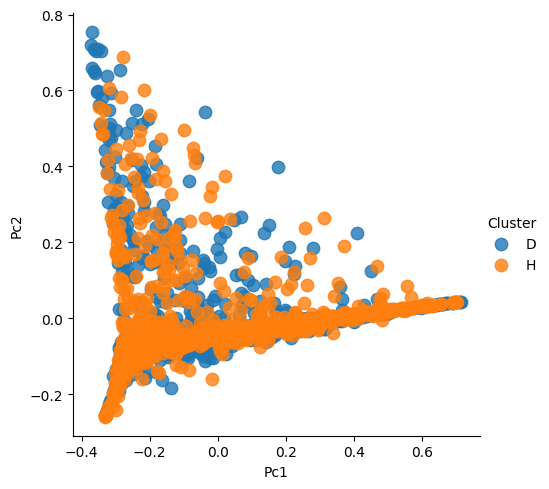

In [ ]:
pca = PCA(n_components=2)
components_HD = pca.fit_transform(dataHD.query('DiseaseState != 0').drop(columns=['DiseaseState', 'From']))
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_HD = pd.DataFrame(data= components_HD, columns= ['Pc1', 'Pc2'])
pca_HD['Cluster'] = dataHD.query('DiseaseState != 0').DiseaseState

sns.lmplot( x="Pc1", y="Pc2",
data=pca_HD, 
fit_reg=False, 
hue='Cluster', # color by cluster
legend=True,
scatter_kws={"s": 80}) 


In [39]:
from sklearn.manifold import TSNE
# tsne = TSNE(metric = 'braycurtis', perplexity=30.0)
tsne = TSNE(metric = 'jaccard', perplexity=30.0)
embeddings = tsne.fit_transform(dataHD.drop(columns=['DiseaseState', 'From']))
# embeddings = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3).fit_transform(dataHD.drop(columns=['DiseaseState', 'From']))
pca_HD_e = pd.DataFrame(data = embeddings, columns = ['Pc1', 'Pc2'])

c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\talno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'D'

In [ ]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

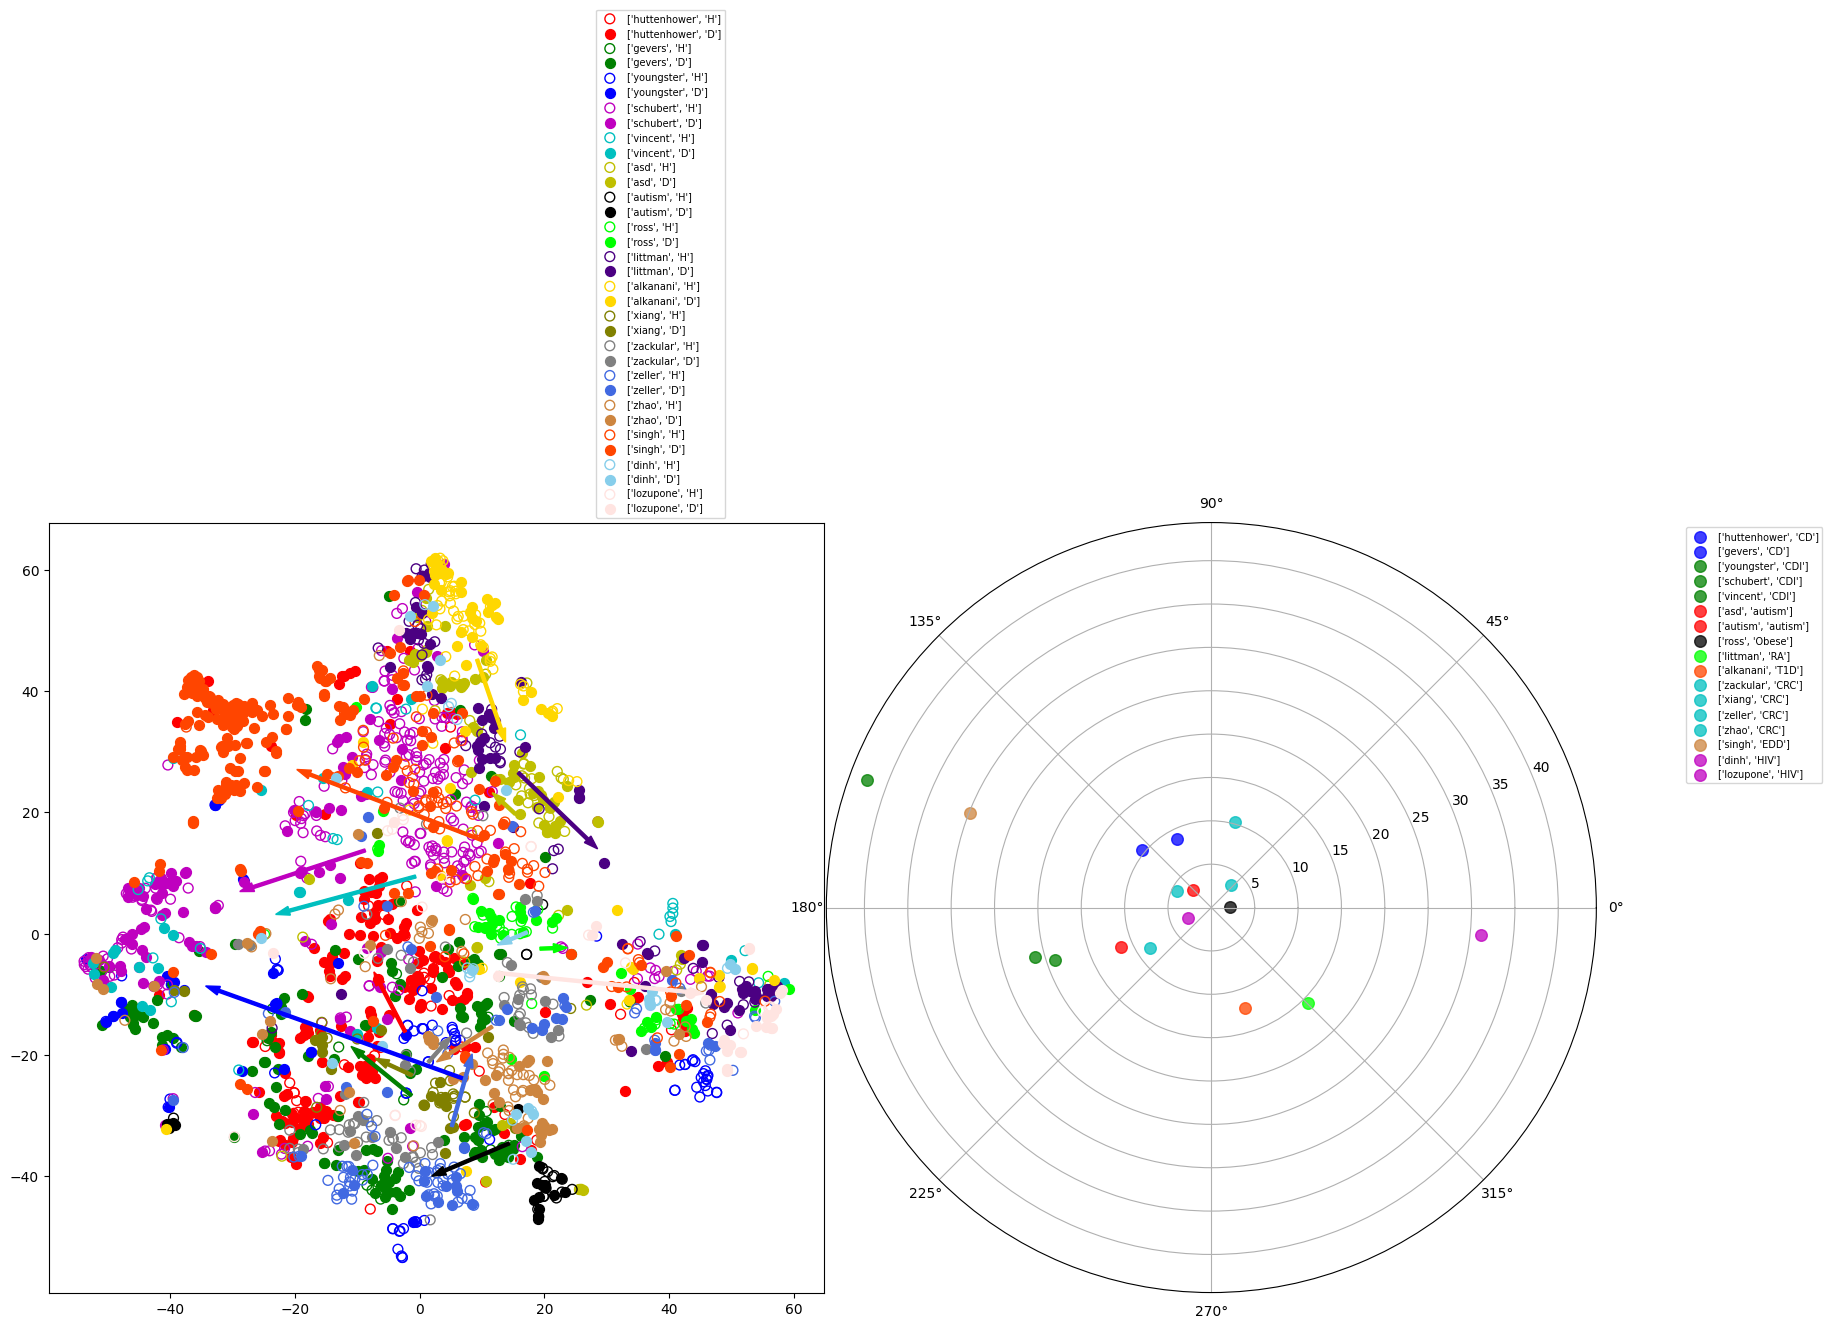

In [ ]:

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, polar=True)

targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]
colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose']
arrows, var_x, var_y, angles, sizes = [], [], [], [], []
# axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
for target, color in zip(targets,colors):
    indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['DiseaseState'] == target[1])
    fill = 'none'
    if target[1] == "D":
        # color = 'r'
        fill = color
    # else:
        # color = 'k'
    x = pca_HD_e.loc[indicesToKeep.values, 'Pc1'].values.mean()
    y = pca_HD_e.loc[indicesToKeep.values, 'Pc2'].values.mean()
    x_v = np.var(pca_HD_e.loc[indicesToKeep.values, 'Pc1'].values)
    y_v = np.var(pca_HD_e.loc[indicesToKeep.values, 'Pc2'].values)
    var_x.append(x_v)
    var_y.append(y_v)
    arrows.append(x)
    arrows.append(y)
    # if target[0] == 'schubert':
    ax1.scatter(pca_HD_e.loc[indicesToKeep.values, 'Pc1'] , pca_HD_e.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)

# find centroids and plotting an arrow
col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
for j in range(0,len(arrows),4):
    ax1.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4], width = 0.5)
    angles.append(math.atan2(arrows[j+3]-arrows[j+1],arrows[j+2]-arrows[j]))
    sizes.append(math.sqrt((arrows[j+2]-arrows[j])**2+(arrows[j+3]-arrows[j+1])**2))
L = ["huttenhower-CD", "gevers-CD", "youngster-CDI", "schubert-CDI","vincent-CDI","asd-ASD","autism","ross-OBESE","littman-RA","alkanani-T1D","xiang-CRC","zackular-CRC","zeller-CRC","zhao-CRC","singh-EDD","dinh-HIV","lozupone-HIV"]
plt.legend(L) 

colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
color_disease = {"CD": 'b', "CDI": 'g', "autism": 'r', "Obese": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime'}
L = [["huttenhower","CD"], ["gevers","CD"], ["youngster","CDI"], ["schubert","CDI"],["vincent","CDI"],["asd","autism"],["autism","autism"],["ross","Obese"],["littman","RA"],["alkanani","T1D"],["zackular","CRC"],["xiang","CRC"],["zeller","CRC"],["zhao","CRC"],["singh","EDD"],["dinh","HIV"],["lozupone","HIV"]]

for angle,name,size,x,y,color in zip(angles,L,sizes,var_x,var_y,colors):
    # ax2.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax2.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    # size = 0.04
    c = ax2.scatter(angle, size, c=color_disease[name[1]], alpha=0.75, s=70)
    # c = ax2.scatter(angle, size, c=color, alpha=0.75, s=50)
ax1.legend(targets,prop={'size': 7}, bbox_to_anchor=(0.7, 1))
ax2.legend(L,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

Bray-Curtis: Bray-Curtis is a widely used distance metric in microbiome analysis. It accounts for the relative abundance of taxa and is not affected by differences in overall sequencing depth. It is generally good for comparing community composition across different samples and habitats.

Jaccard: Jaccard is a binary distance metric that only considers the presence or absence of microbial taxa in a community. It is good for comparing the similarity of microbial communities based on their shared taxa.



[main 95e6ced] all data
 6 files changed, 11412 insertions(+), 1409 deletions(-)
 rewrite american_gut/american_gut_pca.ipynb (67%)
 create mode 100644 american_gut/cleaned_microbiomeHD_29
 create mode 100644 american_gut/cleaned_microbiomeHD_29_g
 rewrite figures/americans_pca_vs_all_pca.png (98%)
